In [2]:
%matplotlib notebook

import pathlib
from scipy import interpolate as interp
import pythtb as pytb
import scipy.linalg as la

import sim_tb as stb
import bz_utilities as bzu
import toy_models as toy
import plot_utils as pltu
import linear_response as lr
import sim_tb_routines as stbr

factor_shc = 7.029e3 # Recorver physiucal units in conductivity

In [3]:
t, J, t2 = 1.0, 1.6, 0.0
mag_mode = "coplanar"
path = toy.init_kagome_model(t, J, t2, mag_mode)
Sim = stb.Simulation_TB(path)


In [ ]:
for index_band in range(6):
    fig2, ax2 = plt.subplots()
    Sim.plot_bands_2d(index_band, fig=fig2,ax=ax2, nk=100)
    fig2.tight_layout()
    fig2.savefig(Sim.path / "bands" / "band_{}.png".format(index_band))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Band structure with and without SOC

<IPython.core.display.Javascript object>


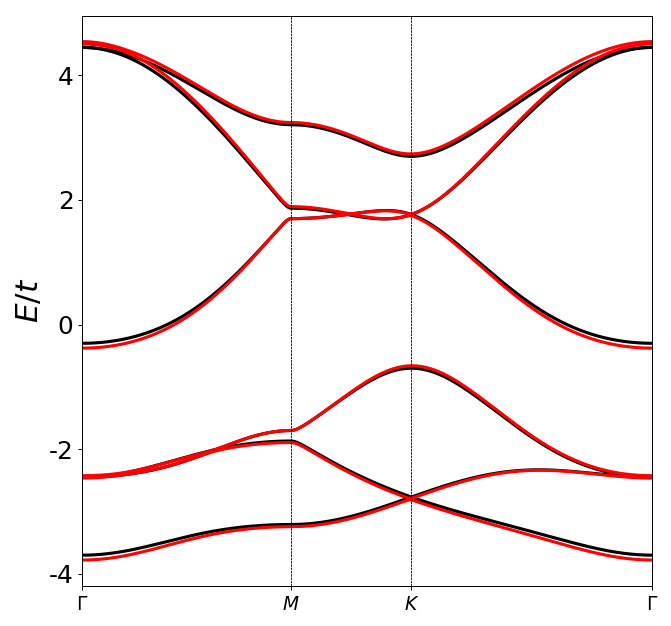

In [98]:
fig, ax = plt.subplots(figsize=(7.5,7))
t, J, t2 = 1.0, 1.7, 0.0
mag_mode = "coplanar_b"
path = toy.init_kagome_model(t, J, t2, mag_mode)
Sim = stb.Simulation_TB(path)
Sim.plot_bands(ax, color="black",lw=2.5)

t, J, t2 = 1.0, 1.7, 0.2
mag_mode = "coplanar_b"
path = toy.init_kagome_model(t, J, t2, mag_mode)
Sim = stb.Simulation_TB(path)
Sim.plot_bands(ax, color="red", lw=2.5)

ax.set_ylabel(r"$E/t$", fontsize=25)

pltu.set_ticks_on_ax(ax, [-4, -2, 0, 2, 4], fs=20, axis="y")


fig.tight_layout()
path_fig = pathlib.Path(toy.ROOT_DIR)  / "saved_plots/kagome/"
toy.mk_dir(path_fig)
fig.savefig(path_fig /"band_structure_kagome_b.png")
plt.show()






In [44]:
t, J, t2 = 1.0, 1.7, 0.2
mag_mode = "coplanar"
path = toy.init_kagome_model(t, J, t2, mag_mode)
Sim = stb.Simulation_TB(path)
Sim.set_fermi_lvl()

t, J, t2 = 1.0, 1.7, 0.0
mag_mode = "coplanar"
path = toy.init_kagome_model(t, J, t2, mag_mode)
Sim0 = stb.Simulation_TB(path)
Sim0.set_fermi_lvl()

#Sim.create_wf_grid(100)
#v_grid = Sim.velocity_operator_grid()
#Js_grid = Sim.spin_current_grid()


<IPython.core.display.Javascript object>


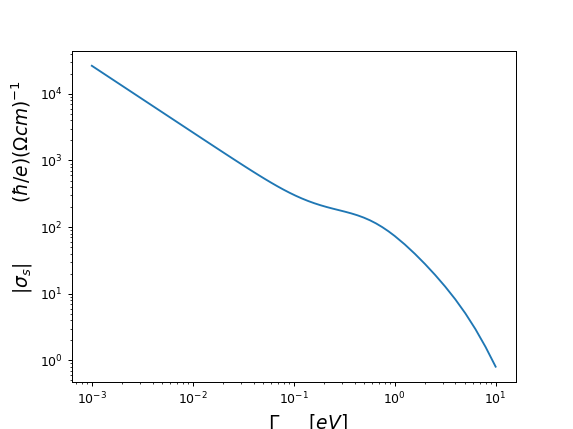

In [5]:
def load_conductivity(Sim, component, mode="s", absolute=False):
    """
    Load a component of the conductivity tensor (spion or charge)
    saved in the simulation directory.
    Parameters:
    -----------
    	Sim: (stb.Simulation_TB)
        	Simulation which contains calculated
            conductivity.
        component: (tuple of len 2 or 3)
        	Component of the conductivity tensor.
            "s": two comoponents.
            "c": three components.
        mode: (str, default is "s")
        	"s" refers to spin conductivity.
            "c" refers to charge conductivity.
        absolute: (bool, default is False)
        	If True, the absolute value of the conductivity
            is plotted. Ignoring the sign.
            
        Returns:
        --------
        	gamma: (np.ndarray)
            conduct: (np.ndarray)
            err: (np.ndarray)
        """
    factor = 7.029e3
    str_mode = {"s":"spin", "c":"charge"}[mode]
    path = Sim.path / "{}_conductivity/".format(str_mode)
    name_file = {"s":"SHC_{}{}{}.npy",
                 "c":"CHC_{}{}.npy"}[mode]
    name_file = name_file.format(*component)
    integ = np.load(path / name_file)
    gamma = integ[:, 0]
    conduct = factor * integ[:, 1]
    if absolute:
        conduct = np.abs(conduct)
    err = factor * integ[:, 2]
    return gamma, conduct, err

def spin_current_angle(Sim, component):
    """
    """
    gamma_c, c_conduct = load_conductivity(Sim, (component[2], component[2]), mode="c")[0:2]
    gamma_s, s_conduct = load_conductivity(Sim, component, mode="s")[0:2]
    print(len(gamma_s), len(gamma_c))
    test = np.sum(gamma_c-gamma_s)
    if test > 1e-9:
        raise Exception("Conductutities were calculated in different gamma arrays.")
    sc_angle = s_conduct / c_conduct
    return gamma_c, sc_angle



fig, ax = plt.subplots()
#gamma, sc_angle = spin_current_angle(Sim, (1,0,0))
#ax.plot(gamma, sc_angle)

gamma, conduct, err = load_conductivity(Sim, (2,0,0), mode="s")
ax.plot(gamma, np.abs(conduct))
                                 
#ratio = shc_arr_100 / shc_arr_200
xlabel = 5*" "+r"$\Gamma$"+5*" "+"$[eV]$"
ylabel = 10*" "+r"$|\sigma_s|$" + 10*" " + "$(\hbar / e)(\Omega cm)^{-1}$"
ax.set_xlabel(xlabel, fontsize=15)
ax.set_ylabel(ylabel, fontsize=15)
ax.set_xscale("log")
ax.set_yscale("log")


#plt.show()

#print(gamma[36])
#print(s_conduct[36])
#print(c_conduct[36])

<IPython.core.display.Javascript object>


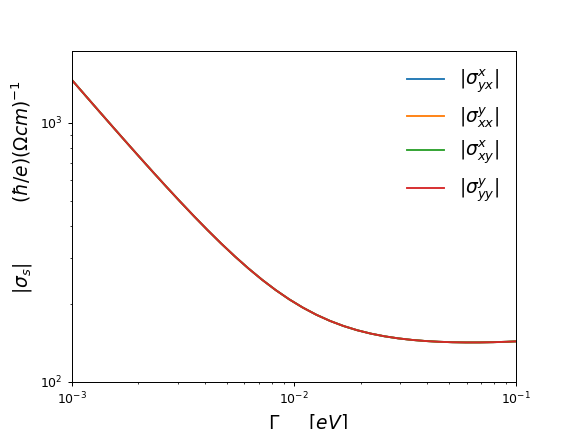

In [11]:

fig0, ax0 = plt.subplots()

components = [(0,1,0),
             (1,0,0),
             (0,0,1),
             (1,1,1)
             ]

for i in range(len(components)):
    comp = components[i]
    label = "|" + pltu.sigma_s_label(comp) + "|"
    gamma, conduct, err = load_conductivity(Sim0, comp, mode="s", absolute=True)
    ax0.plot(gamma,conduct, label=label)
                                 


#ratio = shc_arr_100 / shc_arr_200
xlabel = 5*" "+r"$\Gamma$"+5*" "+"$[eV]$"
ylabel = 10*" "+r"$|\sigma_s|$" + 10*" " + "$(\hbar / e)(\Omega cm)^{-1}$"
ax0.set_xlabel(xlabel, fontsize=15)
ax0.set_ylabel(ylabel, fontsize=15)
ax0.set_xscale("log")
ax0.set_yscale("log")
ax0.set_xlim(left=1e-3, right=0.1)
ax0.set_ylim(1.0e2, 1.9e3)
ax0.legend(loc="best", frameon=False, fontsize=15)



<IPython.core.display.Javascript object>


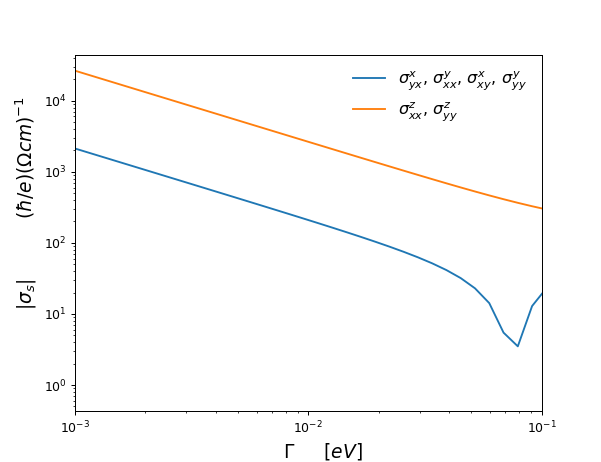

-2.8374171894215063
-2.7535904054700566


In [42]:
fig, ax = plt.subplots()

components = [(0,1,0),
             (1,0,0),
             (0,0,1),
             (1,1,1),
             (2,0,0),
             (2,1,1)
             ]
components = [(0, 1, 0), (2,0,0)]
label1 = pltu.sigma_s_label((0,1,0)) + ", " + pltu.sigma_s_label((1,0,0)) + ", " + pltu.sigma_s_label((0,0,1)) + ", " + pltu.sigma_s_label((1,1,1))
label2 = pltu.sigma_s_label((2,0,0)) + ", " + pltu.sigma_s_label((2,1,1))

labels = {0: label1, 1:label2}
for i in range(len(components)):
    comp = components[i]
    label = pltu.sigma_s_label(comp)
    label = labels[i]
    gamma, conduct, err = load_conductivity(Sim, comp, mode="s")
    ax.plot(gamma, np.abs(conduct), label=label, ls="-")
                                 
#ratio = shc_arr_100 / shc_arr_200
xlabel = 5*" "+r"$\Gamma$"+5*" "+"$[eV]$"
ylabel = 10*" "+r"$|\sigma_s|$" + 10*" " + "$(\hbar / e)(\Omega cm)^{-1}$"
ax.set_xlabel(xlabel, fontsize=15)
ax.set_ylabel(ylabel, fontsize=15)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(left=1e-3, right=0.1)
ax.legend(loc="best", frameon=False, fontsize=13)
print(Sim.Ef)
print(Sim0.Ef)

## Spin/charge tranfer

<IPython.core.display.Javascript object>


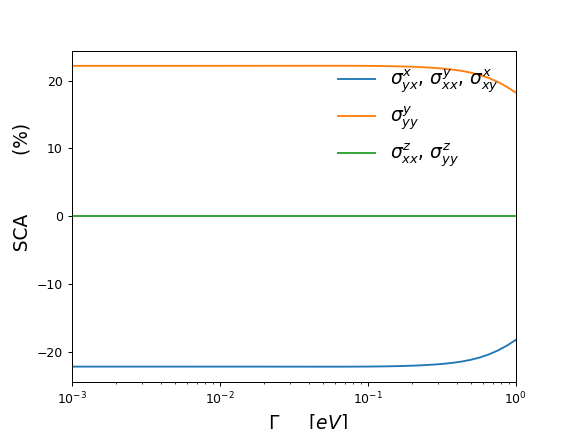

60 60
60 60
60 60


Text(0,0.5,'          SCA          (%)')

In [39]:
fig, ax = plt.subplots()

components = [(0,1,0),
             (1,0,0),
             (0,0,1),
             (1,1,1),
             (2,0,0),
             (2,1,1),
             ]
components = [
    (0,1,0),
    (1,1,1),
    (2,1,1)
]
label1  = pltu.sigma_s_label((0,1,0)) + ", " + pltu.sigma_s_label((1,0,0)) + ", " + pltu.sigma_s_label((0,0,1))
label2 = pltu.sigma_s_label((1,1,1))
label3 = pltu.sigma_s_label((2,0,0)) + ", " + pltu.sigma_s_label((2,1,1))

labels = {0: label1, 1:label2, 2:label3}
for i in range(len(components)):
    comp = components[i]
    #label = pltu.sigma_s_label(comp) +"/" + pltu.sigma_s_label((comp[2], comp[2]))
    label = labels[i]
    gamma, angle = spin_current_angle(Sim0, comp)
    ax.plot(gamma, 100*angle, label=label)
    
ax.legend(loc="best", frameon=False, fontsize=15)
ax.set_xscale("log")

ax.set_xlim(left=1e-3, right=1)

xlabel = 5*" "+r"$\Gamma$"+5*" "+"$[eV]$"
ylabel = 10*" "+"SCA" + 10*" " + "(%)"
ax.set_xlabel(xlabel, fontsize=15)
ax.set_ylabel(ylabel, fontsize=15)

## Plot spin conductivity integrand in the 1BZ

In [ ]:
nk = 100
k = np.linspace(0, 1, num=nk)
sigma_k = np.zeros((nk, nk))
for k1 in k:
    for k2 in k:
        sigma_k = 0

## Integrating Berry Curvature in the 1BZ: 
### ¿Can we get an integer number?
### Yes! It integrates an integer.

<IPython.core.display.Javascript object>


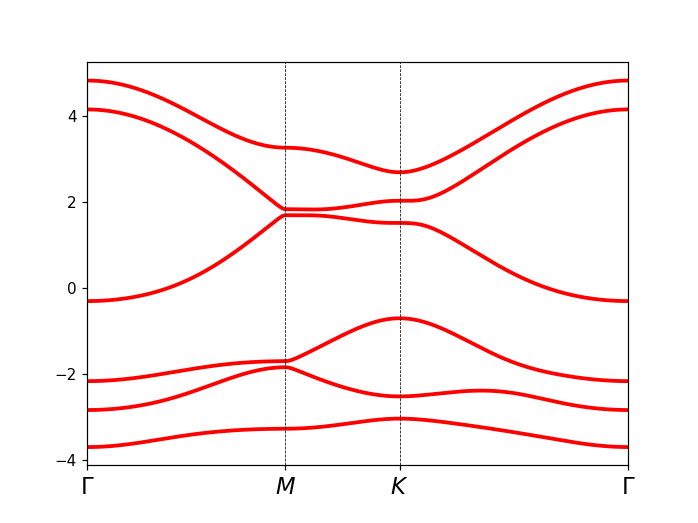

In [3]:
t, J, t2 = 1.0, 1.7, 0.2
mag_mode = "coplanar"
path = toy.init_kagome_model(t, J, t2, mag_mode)
Sim = stb.Simulation_TB(path)
Sim.set_fermi_lvl()
fig, ax = plt.subplots()
Sim.plot_bands(ax, color="red", lw=2.5)

In [4]:
C = Sim.chern_number(0)[0]
print(C)

-0.02193667961339618


## Chern's number on each band:

###     C[0] = -1
###     C[1] = 3
###     C[2] = -2
###     C[3] = -2
###     C[4] = 3
###     C[5] = -2 





In [8]:
hbar = 1.054e-34
e_charge = 1.602e-19
e_charge**2 / hbar/(4e-8) * (2/np.sqrt(3))

7029.003986002527

## Even Spin currents () in units of (Ohm cm)^-1
### (x, y, x) =  (y, x, x) = (x, x, y) = (y, y, y) =  (z, x, x)  (z, y, y) = 0
### 
### The followings were zero in the odd current
### (x, x, x) = -320.7942
### (y, y, x) = 320.7942
### (z, y, x) = 484.4113
### (z, x, y) = -484.4113
### (y, x, y)  = 320.7942
### (x, y, y) = 320.7942



In [4]:
Sim.spin_conductivity(1, 1, 5e-2)

(-0.027082901589891163, 9.896302838404217e-06)

## Plot of Berry curvature in 1BZ
## Plot of Spin berry curvature in 1BZ

In [7]:
def curvature_2d(Sim, nk, n, mode="c", rp=True):
    delta_k = 1.6 * np.pi
    k = np.linspace(-delta_k, delta_k, nk)
    kx, ky = np.meshgrid(k, k)
    M = bzu.cartesian_to_reduced_k_matrix(Sim.rlat[0], Sim.rlat[1])
    Berry = np.zeros((nk, nk))
    curvature = {"c":Sim.berry_curvature,
                "s":Sim.spin_berry_curvature}[mode]
    casting = "re" if rp else "im"

    for i1 in range(nk):
        for i2 in range(nk):
            k_vec = np.array([kx[i1, i2], ky[i1, i2]])
            k_red = M @ k_vec
            args_c = (k_red[0], k_red[1], n,0, 1)
            args_s = (k_red[0], k_red[1], n, 2,0, 1)
            args = {"c":args_c, "s":args_s}[mode]
            Berry[i1, i2] = curvature(*args, mode=casting)
    return Berry
    

In [8]:
nk = 150
Berry = np.zeros((6,nk,nk))
for i in range(1):
    Berry[i, :, :] =  curvature_2d(Sim, nk, i,mode="s")

<IPython.core.display.Javascript object>


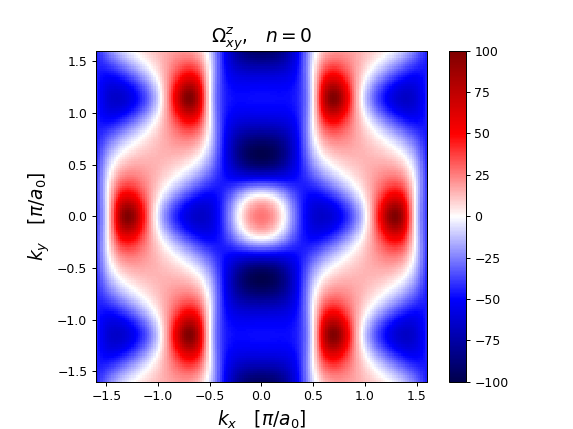

In [12]:
def normalize_data(data):
    vmin = np.min(data)
    vmax = np.max(data)
    norm_data = -100 + 200* (data-vmin) / (vmax-vmin)
    return norm_data


n = 0
fig, ax = plt.subplots()
extent = [-1.6,1.6,-1.6,1.6]
img = ax.imshow(normalize_data(Berry[n]), origin= "lower", cmap="seismic", extent=extent)
str_Om = r"$\Omega^{z}_{xy}$"
ax.set_title(str_Om + ",   $n={}$".format(n), fontsize=15)
ax.set_xlabel(r"$k_x$   $[\pi/a_0]$", fontsize=15)
ax.set_ylabel(r"$k_y$   $[\pi/a_0]$", fontsize=15)
plt.colorbar(img)

## Even spin conductivity vs Ef

In [83]:
def plot_cond_Ef(ax, Sim, mode, component, extra_arg=(), color=None, label="", mode_comp=None, exp=0):
    units = 2.43e-4 * 2 / np.sqrt(3) * 10**exp # e[Ohm] / areaBZ[adim]
    
    tr = mode.split("_")[1]
    sigma_label = pltu.sigma_s_label(component, extra_sup=",({})".format(tr))
    Ef_arr, cond_arr = stbr.load_cond_vs_Ef(Sim, mode, component,extra_arg=extra_arg)
    if not(mode_comp is None):
        factor = {"a":-1, "s":1}[mode_comp]
        ncomp = len(component)
        component_T = [*component]
        component_T[ncomp-2], component_T[ncomp-1] = component[ncomp-1], component[ncomp-2]
        Ef_arr, cond_arr_T = stbr.load_cond_vs_Ef(Sim, mode, component_T,extra_arg=extra_arg)
        cond_arr = 0.5 * (cond_arr + factor * cond_arr_T)
        sigma_label = pltu.sigma_s_label(component, extra_sup=",({},{})".format(mode_comp,tr))
    max_cond = np.max(np.abs(cond_arr))
    if max_cond > 1e-8 or True:
        label = sigma_label + label
        ax.plot(units*cond_arr, Ef_arr, label=label, color=None)
        
def format_cond_Ef_plot(ax, exp=0):
    str_exp = "   $10^{" + str(-exp) + "} $"
    if exp==0:
        str_exp = " "
    sigma_label = r"$\sigma^{\gamma}_{\alpha \beta}$"#pltu.sigma_s_label(component, extra_sup=",(even)")
    units = str_exp +  r"$(\hbar/e) \Omega^{-1}$"
    ax.set_xlabel(sigma_label + units, fontsize = 15)
    ax.set_ylabel(r"$E_F$  [eV]", fontsize=15)
    ax.legend(frameon=False, loc="best", fontsize=13)

components_dicts = [
    {"comp":(0,0,0)},
    {"comp":(0,1,1)},
    {"comp":(0,0,1)},
    {"comp":(0,1,0)},
    {"comp":(1, 0,0)},
    {"comp":(1, 1,1)},
    {"comp":(1, 0,1)},
    {"comp":(1, 1,0)},
    {"comp":(2, 0,0)},
    {"comp":(2, 1,1)},
    {"comp":(2, 0,1)},
    {"comp":(2, 1,0)}
]

<IPython.core.display.Javascript object>


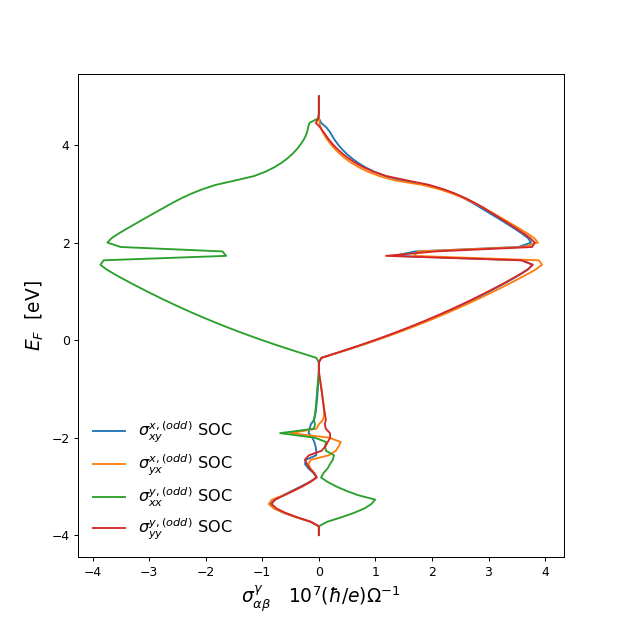

In [96]:
t, J, t2 = 1.0, 1.7, 0.2
mag_mode = "coplanar_b"
path0 = toy.init_kagome_model(t, J, 0.0, mag_mode)
Sim0 = stb.Simulation_TB(path0)

path = toy.init_kagome_model(t, J, t2, mag_mode)
Sim = stb.Simulation_TB(path)


component = (0,0,1)
mode = "s_odd"
tr = mode.split("_")[1]
extra_arg = {"even": (), "odd":(2e-2,)}[tr]
fig, ax = plt.subplots(figsize=(7,7))

mode_comp = None##"a"#"s"

exponent = -7
plot_cond_Ef(ax, Sim, mode, component,extra_arg=extra_arg,label=" SOC", mode_comp=mode_comp, exp=exponent)
plot_cond_Ef(ax, Sim, mode, (0,1,0), extra_arg=extra_arg,  label=" SOC", mode_comp=None, exp=exponent)
plot_cond_Ef(ax, Sim, mode, (1,0,0), extra_arg=extra_arg,  label=" SOC", mode_comp=None, exp=exponent)
plot_cond_Ef(ax, Sim, mode, (1,1,1), extra_arg=extra_arg,  label=" SOC", mode_comp=None, exp=exponent)

#plot_cond_Ef(ax, Sim, mode, (2,1,0), extra_arg=extra_arg,  label="  SOC", mode_comp=None)

#plot_cond_Ef(ax, Sim0, mode, component, extra_arg=extra_arg,  label="  SOC", mode_comp="a", exp=exponent)


format_cond_Ef_plot(ax, exp=exponent)


<IPython.core.display.Javascript object>


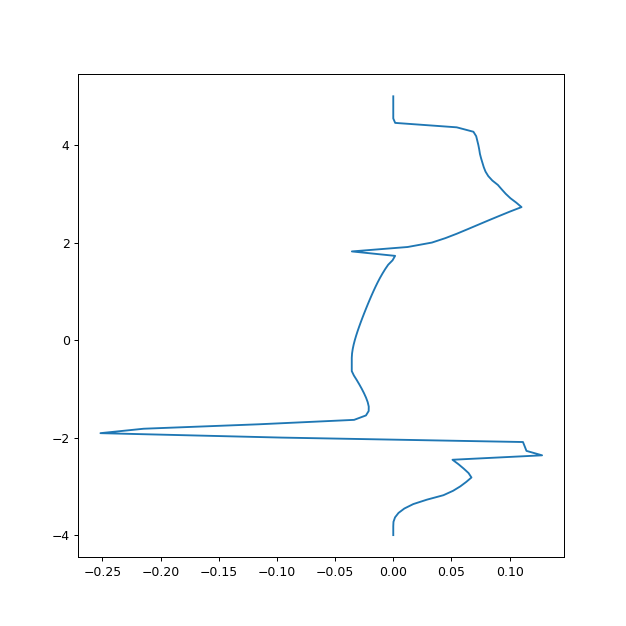

In [35]:
fig, ax = plt.subplots(figsize=(7,7))
label=""
Ef_arr, cond_arr = stbr.load_cond_vs_Ef(Sim, mode, (2,0,1))
Ef_arr, cond_arr_T = stbr.load_cond_vs_Ef(Sim, mode, (2,1,0))
cond_arr = 0.5 * (cond_arr - cond_arr_T)
max_cond = np.max(np.abs(cond_arr))
if max_cond > 1e-8:
    sigma_label = pltu.sigma_s_label(component, extra_sup=",({})".format(tr))
    label = sigma_label + label
    ax.plot(cond_arr, Ef_arr, label=label, color=None)

## SHE vs SOC

<IPython.core.display.Javascript object>


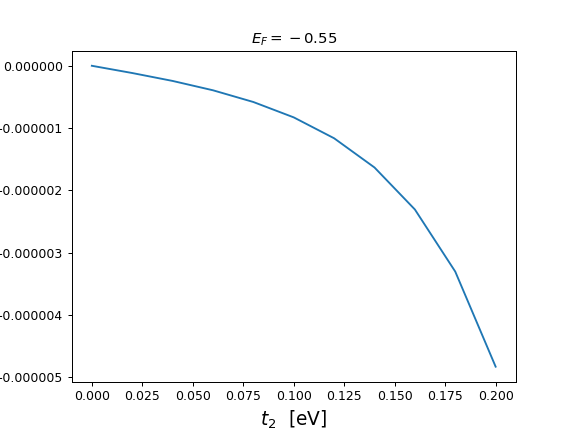

Text(0.5,1,'$E_F=-0.55$')

In [42]:
t2_arr = np.linspace(0, 0.2, num=11)
cond = np.zeros_like(t2_arr)

nsoc = np.size(t2_arr)
t, J = 1.0, 1.7
mag_mode = "coplanar_c"
iE = 38
for i in range(nsoc):
    t2 = t2_arr[i]
    path = toy.init_kagome_model(t, J, t2, mag_mode)
    Sim = stb.Simulation_TB(path)
    Ef_arr, cond_arr = stbr.load_cond_vs_Ef(Sim, "s_odd", (2,0,1),extra_arg=(2e-2,))
    cond[i] = cond_arr[iE]
Ef = Ef_arr[iE]
fig, ax = plt.subplots()
ax.plot(t2_arr, cond)
ax.set_xlabel("$t_2$  [eV]",fontsize = 15)
sigma_label = r"$\sigma^{\gamma}_{\alpha \beta}$"
units = r"   $(e^2/h)(\hbar/e)$"
ax.set_ylabel(sigma_label + units, fontsize = 15)
ax.set_title("$E_F={}$".format(np.round(Ef,2)))

    


## Benchmarking einsum

In [8]:
%load_ext line_profiler

In [4]:
Sim.create_k_grid(100)

In [37]:
def path_einsum(Sim):
    S = bzu.pauli_matrix(2) / 2
    eivecs = Sim.red_eivecs_grid
    path = np.einsum_path("kqnis, st, kqmit-> kqnm", eivecs.conj(), S, eivecs)
    return path
def einsum1(Sim, opt = False):
    S = bzu.pauli_matrix(2) / 2
    eivecs = Sim.red_eivecs_grid
    for i in range(100):
        S_eig = np.einsum("kqnis, st, kqmit-> kqnm", eivecs.conj(), S, eivecs, optimize=opt)

In [42]:
%lprun -f einsum1 einsum1(Sim,opt=path[0])

Timer unit: 1e-06 s

Total time: 0.056616 s
File: <ipython-input-10-a60b756bb010>
Function: einsum1 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def einsum1(Sim):
     2         1         41.0     41.0      0.1      S = bzu.pauli_matrix(2) / 2
     3         1          1.0      1.0      0.0      eivecs = Sim.red_eivecs_grid
     4         1      56574.0  56574.0     99.9      S_eig = np.einsum("kqnis, st, kqmit-> kqnm", eivecs.conj(), S, eivecs)

In [40]:
path = path_einsum(Sim)

In [41]:
print(path[0])

['einsum_path', (0, 1), (0, 1)]


In [5]:
Sim.create_k_grid(100)

In [11]:
mode = "c_odd"
Gamma=2e-2
tr = mode.split("_")[1]
extra_arg = {"even": (), "odd": (Gamma,)}[tr]
component = {"s":(2,1,1), "c":(1,1)}[mode[0]]
Sim.Ef = -2.7535904054700566

sigma_old = Sim.conductivity_grid_old(mode, component, extra_arg=extra_arg)
sigma_new = Sim.conductivity_grid(mode, component, extra_arg=extra_arg)
print("Sigma old, mode {} = {}".format(mode, sigma_old))
print("Sigma new, mode {} = {}".format(mode, sigma_new))
print("error:", sigma_old/sigma_new * 100-100)

Sigma old, mode c_odd = -0.10151980221014799
Sigma new, mode c_odd = -0.10151980221014835
error: -3.552713678800501e-13


In [11]:
k = np.linspace(0, 1, num=Sim.nk)
dk = k[1] - k[0]
dk

0.010101010101010102

In [13]:
1/(Sim.nk-1)

0.010101010101010102

## SHE using spin Berry curvature (Zhang2018)

In [3]:
t, J, t2 = 1.0, 1.7, 0.2
mag_mode = "coplanar"
path = toy.init_kagome_model(t, J, t2, mag_mode)
Sim = stb.Simulation_TB(path)
Sim.create_k_grid(100)

In [4]:
component = (2,0,1)
Sim.Ef = -2.7535904054700566
scond = Sim.conductivity_grid("s_even", component, integ_k=False)
scond_zh = Sim.conductivity_grid("s_even_zh", component, integ_k = False)

In [7]:
print("Zelezny: ", scond)
print("Zhang: ", scond_zh)

Zelezny:  -0.04213401336936885
Zhang:  (-0.04213401336936885-9.481304630298837e-18j)


In [10]:
ind = np.argmax(np.abs(scond-scond_zh))
s1 = np.reshape(scond, -1)[ind]
s2 = np.reshape(scond_zh, -1)[ind]

In [13]:
sr = np.real(scond_zh)
si = np.imag(scond_zh)

In [14]:
np.sum(sr) / 100**2

-0.04213401336936885

In [15]:
np.sum(si) / 100**2

-9.481304630298837e-18

<IPython.core.display.Javascript object>


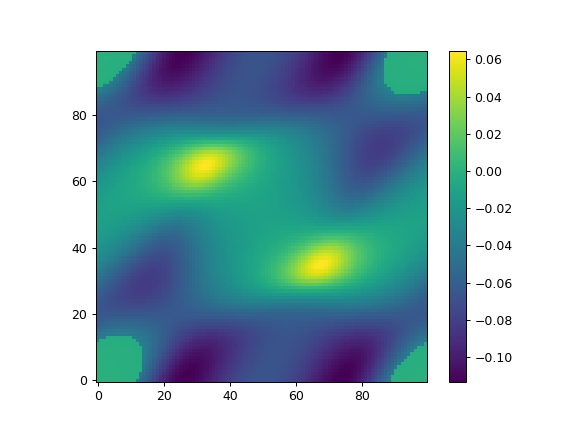

In [26]:
fig, ax = plt.subplots()
img = ax.imshow(sr, origin="lower")
plt.colorbar(img)

<IPython.core.display.Javascript object>


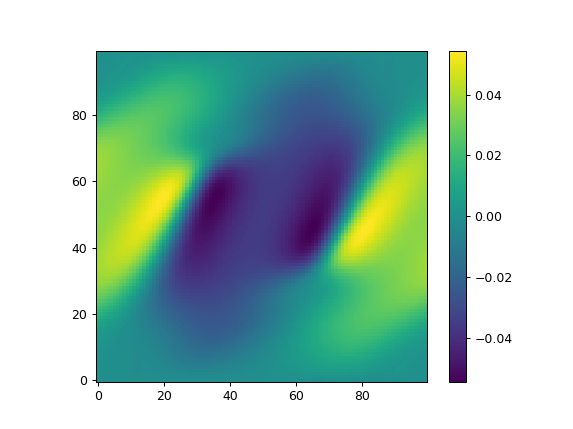

In [30]:
fig, ax = plt.subplots()
img = ax.imshow(si, origin="lower")
plt.colorbar(img)